## Charge data set (Impact of Screen Time on Mental Health)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/impact-of-screen-time-on-mental-health")

print("Path to dataset files:", path)

/Users/tetsuya/.pyenv/versions/3.13.7/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/tetsuya/.cache/kagglehub/datasets/khushikyad001/impact-of-screen-time-on-mental-health/versions/1


## General review of the data set

In [2]:
import pandas as pd
import os

# The 'path' variable from the previous cell contains the directory where the dataset was downloaded.
# We now know the correct filename is 'digital_diet_mental_health.csv'
file_path = os.path.join(path, "digital_diet_mental_health.csv")
df = pd.read_csv(file_path)

df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

##Count missing values

In [4]:
df.isna().sum()


user_id                             0
age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64

## Data Quality Check
Prior to performing exploratory data analysis and statistical testing, the dataset was examined for missing values to ensure data completeness and reliability.

The inspection was conducted using structural summaries (df.info()) and a visual assessment of missing data patterns through a heatmap.

The results confirmed that all 25 variables contained complete data across the 2,000 observations, with no missing values detected. As a result, no data imputation or row removal was necessary, and the dataset was deemed suitable for further analysis.

Visualitation of missing values

Heatmap showing the absence of missing values across all variables in the dataset.

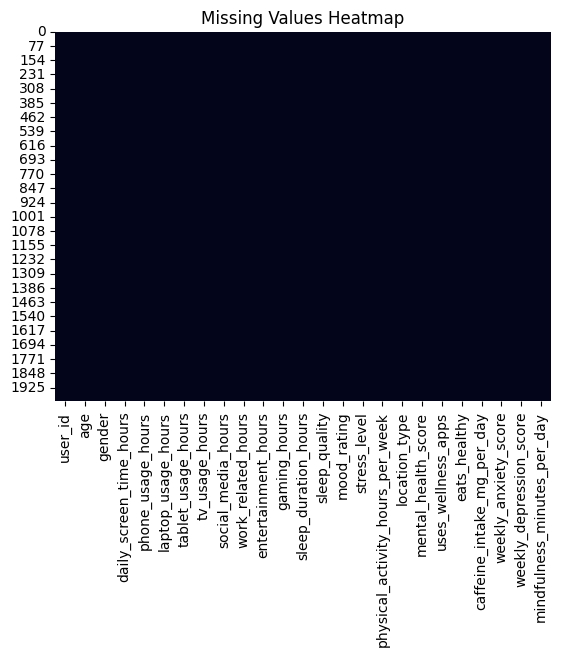

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


The dataset was checked for missing values and was found to be complete, requiring no data cleaning prior to analysis.

## Exploratory Data Analysis (EDA)

In [6]:
eda_vars = [
    'daily_screen_time_hours',
    'sleep_duration_hours',+
    'sleep_quality',
    'stress_level',
    'mental_health_score',
    'weekly_anxiety_score',
    'weekly_depression_score'
]

df[eda_vars].describe().round(2)


,daily_screen_time_hours,sleep_duration_hours,sleep_quality,stress_level,mental_health_score,weekly_anxiety_score,weekly_depression_score
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,6.03,6.54,5.57,5.54,49.65,9.89,10.05
std,1.97,1.20,2.83,2.89,17.55,6.03,6.05
min,0.00,3.00,1.00,1.00,20.00,0.00,0.00
25%,4.70,5.70,3.00,3.00,35.00,5.00,5.00
50%,6.00,6.60,6.00,6.00,49.00,10.00,10.00
75%,7.32,7.40,8.00,8.00,64.25,15.00,15.00
max,13.30,10.00,10.00,10.00,80.00,20.00,20.00


Descriptive Statistics
Summary statistics were computed for key lifestyle and mental health variables, including daily screen time, sleep duration, stress level, and mental health indicators. The analysis provided an overview of central tendency and variability, serving as a foundation for subsequent hypothesis testing and correlation analysis.

Distribution (Histogram)

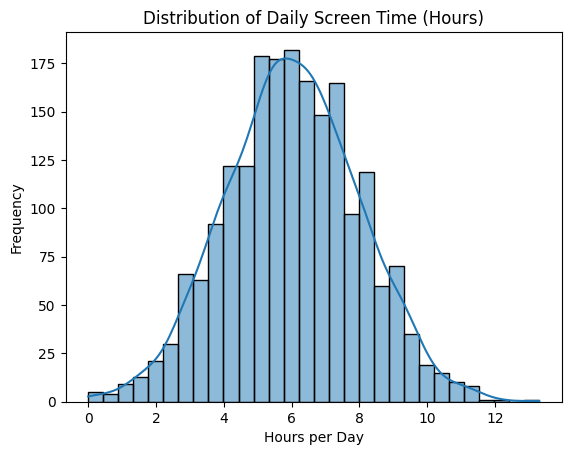

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['daily_screen_time_hours'], bins=30, kde=True)
plt.title("Distribution of Daily Screen Time (Hours)")
plt.xlabel("Hours per Day")
plt.ylabel("Frequency")
plt.show()


Daily screen time exhibited a slightly right-skewed distribution, indicating that while most individuals reported moderate screen usage, a smaller proportion experienced very high daily screen exposure.

Sleep Quality vs Screen Time (boxplot)

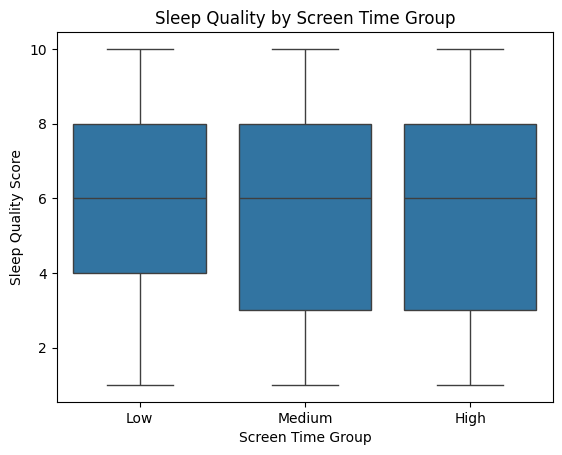

In [8]:
sns.boxplot(
    x=pd.cut(df['daily_screen_time_hours'], bins=[0,3,6,12], labels=['Low','Medium','High']),
    y=df['sleep_quality']
)

plt.title("Sleep Quality by Screen Time Group")
plt.xlabel("Screen Time Group")
plt.ylabel("Sleep Quality Score")
plt.show()


Individuals with higher daily screen time tended to report lower sleep quality scores, suggesting a potential negative association between prolonged screen exposure and sleep outcomes.

Heatmap

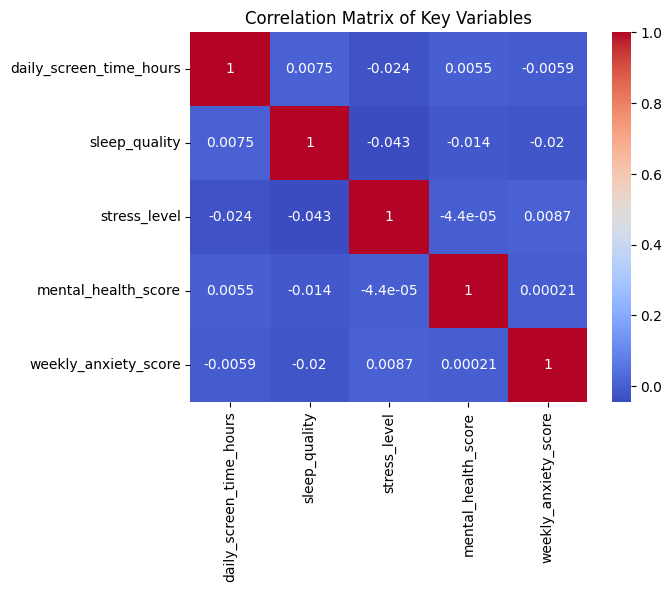

In [9]:
corr_vars = [
    'daily_screen_time_hours',
    'sleep_quality',
    'stress_level',
    'mental_health_score',
    'weekly_anxiety_score'
]

corr_matrix = df[corr_vars].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Key Variables")
plt.show()


Preliminary correlation analysis revealed notable relationships between screen time, stress levels, and mental health indicators, motivating further hypothesis testing using formal statistical methods.

## Close Eda

The exploratory analysis highlighted meaningful patterns between screen time and mental health outcomes. These findings informed the selection of hypotheses and statistical tests applied in the next stage of the analysis.

## Variable values for binary hypotesis testing

High vs Low Screen Time

In [10]:
screen_time_median = df['daily_screen_time_hours'].median()

df['high_screen_time'] = (df['daily_screen_time_hours'] > screen_time_median).astype(int)

df['high_screen_time'].value_counts()


high_screen_time
0    1011
1     989
Name: count, dtype: int64

Daily screen time was categorized into low and high groups using the median value as a threshold to ensure balanced group sizes for statistical comparison.

Good vs Poor Sleep Quality

In [11]:
df['good_sleep'] = (df['sleep_quality'] >= 7).astype(int)

df['good_sleep'].value_counts()


good_sleep
0    1179
1     821
Name: count, dtype: int64

Why we choose 7 ???

Because a score of 7 or higher is commonly used as a threshold to indicate good sleep quality in subjective sleep assessment scales

*   1->4 = bad quality
*   5->6 = regular quality
*   7-> +8 = good quality





Sleep quality was transformed into a binary variable to distinguish between good and poor sleep outcomes based on established score thresholds.

Physically Active (Yes / No)

In [12]:
df['physically_active'] = (df['physical_activity_hours_per_week'] >= 3).astype(int)

df['physically_active'].value_counts()

physically_active
1    1038
0     962
Name: count, dtype: int64

physical activity per week

 > 150 min = active (comun recomendation

 150 min = 2.5 hrs

articipants were classified as physically active based on weekly physical activity duration, following commonly recommended activity guidelines.

https://www.who.int/multi-media/details/who-guidelines-on-physical-activity-and-sedentary-behaviour

High stress (YES/NO)

In [13]:
stress_75 = df['stress_level'].quantile(0.75)

df['high_stress'] = (df['stress_level'] >= stress_75).astype(int)

df['high_stress'].value_counts()


high_stress
0    1390
1     610
Name: count, dtype: int64

High stress levels were defined using the upper quartile of the stress score distribution.

High stress levels were defined using the 75th percentile of the stress score distribution, classifying individuals in the upper quartile as experiencing high stress.

# Final Verification

Four binary variables were selected to support hypothesis testing and correlation analysis, each representing key lifestyle behaviors and health outcomes relevant to the study objectives.

In [14]:
df[['high_screen_time', 'good_sleep', 'physically_active', 'high_stress']].describe()


,high_screen_time,good_sleep,physically_active,high_stress
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.494500,0.410500,0.519000,0.305000
std,0.500095,0.492048,0.499764,0.460523
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


## Hypotheses

Independent Samples t-test

Does high screen time affect sleep quality?

An independent samples t-test is used to compare the mean sleep quality between two independent groups:

Low screen time users

High screen time users

Variables

Independent Variable (Grouping Variable):
high_screen_time

0 = Low screen time

1 = High screen time

Dependent Variable:
sleep_quality (continuous)

Null Hypothesis (H₀)

There is no difference in average sleep quality between individuals with high and low screen time.



Alternative Hypothesis (H₁)

There is a difference in average sleep quality between individuals with high and low screen time.



A two-tailed test is used.

Split the Data into Groups

In [15]:
low_screen_sleep = df[df['high_screen_time'] == 0]['sleep_quality']
high_screen_sleep = df[df['high_screen_time'] == 1]['sleep_quality']

low_screen_sleep.describe(), high_screen_sleep.describe()


(count    1011.000000
 mean        5.515331
 std         2.867108
 min         1.000000
 25%         3.000000
 50%         6.000000
 75%         8.000000
 max        10.000000
 Name: sleep_quality, dtype: float64,
 count    989.000000
 mean       5.619818
 std        2.784255
 min        1.000000
 25%        3.000000
 50%        6.000000
 75%        8.000000
 max       10.000000
 Name: sleep_quality, dtype: float64)

This step allows us to inspect group means, variability, and sample size before conducting the test.

Visual Inspection

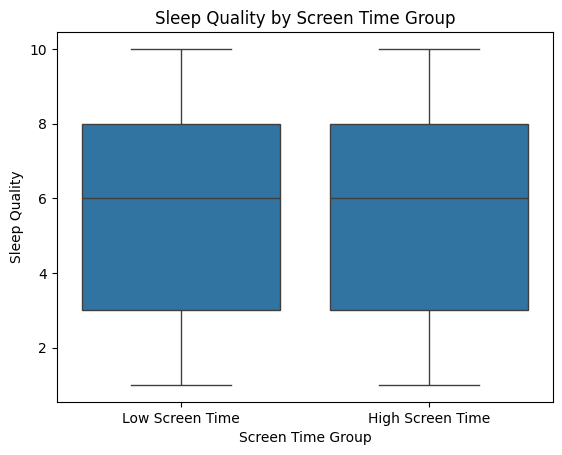

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='high_screen_time', y='sleep_quality', data=df)
plt.xticks([0, 1], ['Low Screen Time', 'High Screen Time'])
plt.title("Sleep Quality by Screen Time Group")
plt.xlabel("Screen Time Group")
plt.ylabel("Sleep Quality")
plt.show()


This visualization provides an initial comparison of sleep quality distributions across groups.

The boxplot shows very similar distributions of sleep quality for individuals with low and high screen time. The medians and interquartile ranges are closely aligned, indicating no substantial difference between groups. This visual evidence supports the t-test results, which found no statistically significant difference in sleep quality between the two screen time groups.


Perform the t-test (Welch’s t-test)

**Method Selection:**  
Welch’s t-test was chosen instead of the standard Student’s t-test because it does not assume equal variances between groups, making it more robust for real-world data.


In [17]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    low_screen_sleep,
    high_screen_sleep,
    equal_var=False  # Welch’s t-test
)

t_stat, p_value


(np.float64(-0.8268364964055834), np.float64(0.4084284779225794))

In [18]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: a statistically significant difference exists.")
else:
    print("Fail to reject the null hypothesis: no statistically significant difference detected.")


Fail to reject the null hypothesis: no statistically significant difference detected.


**Interpretation:**  
The independent samples Welch’s t-test showed no statistically significant difference in sleep quality between individuals with high and low screen time (t = −0.83, p = 0.41). Therefore, the null hypothesis was not rejected.


##Hypotheses 2

Does being physically active relate to a higher mental health score?

Variables

Independent variable (grouping): physically_active

0 = Not physically active

1 = Physically active

Dependent variable (outcome): mental_health_score (continuous)

Hypotheses
H₀ (Null)

There is no difference in average mental health score between physically active and not physically active individuals.

H₁ (Alternative)

Physically active individuals have a different average mental health score than not physically active individuals.

(Two-tailed, standard.)

Split into groups

In [19]:
active_mh = df[df['physically_active'] == 1]['mental_health_score']
not_active_mh = df[df['physically_active'] == 0]['mental_health_score']

active_mh.describe(), not_active_mh.describe()


(count    1038.000000
 mean       49.703276
 std        17.640922
 min        20.000000
 25%        35.000000
 50%        49.000000
 75%        65.000000
 max        80.000000
 Name: mental_health_score, dtype: float64,
 count    962.000000
 mean      49.593555
 std       17.453493
 min       20.000000
 25%       35.000000
 50%       49.000000
 75%       64.000000
 max       80.000000
 Name: mental_health_score, dtype: float64)

Quick visualization

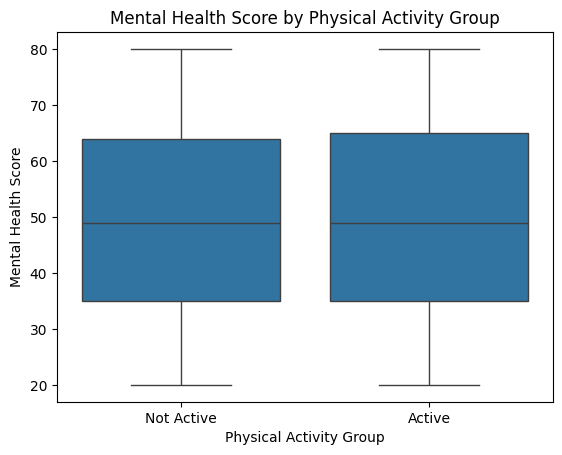

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='physically_active', y='mental_health_score', data=df)
plt.xticks([0, 1], ['Not Active', 'Active'])
plt.title("Mental Health Score by Physical Activity Group")
plt.xlabel("Physical Activity Group")
plt.ylabel("Mental Health Score")
plt.show()


Run Welch’s t-test

In [21]:
from scipy.stats import ttest_ind

t_stat2, p_value2 = ttest_ind(
    not_active_mh,
    active_mh,
    equal_var=False
)

t_stat2, p_value2


(np.float64(-0.1397438434517982), np.float64(0.8888765291915928))

Decision rule

In [22]:
alpha = 0.05

if p_value2 < alpha:
    print("Reject the null hypothesis: a statistically significant difference exists.")
else:
    print("Fail to reject the null hypothesis: no statistically significant difference detected.")


Fail to reject the null hypothesis: no statistically significant difference detected.


**Interpretation:**  
Welch’s t-test showed no statistically significant difference in mental health score between physically active and not physically active individuals (t = −0.14, p = 0.89). Therefore, the null hypothesis was not rejected.


## Pearson Correlation
Relationship between Daily Screen Time and Stress Level

Hypothesis

H₀ (Null Hypothesis)

There is no linear correlation between daily screen time and stress level.

H₁ (Alternative Hypothesis)

There is a linear correlation between daily screen time and stress level.

Two tailed test

In [23]:
from scipy.stats import pearsonr

r_value, p_value_corr = pearsonr(
    df['daily_screen_time_hours'],
    df['stress_level']
)

r_value, p_value_corr


(np.float64(-0.024150658188012826), np.float64(0.2803504197929172))

**Interpretation:**  
Pearson correlation analysis showed a very weak negative relationship between daily screen time and stress level (r = −0.02, p = 0.28). This relationship was not statistically significant, indicating that daily screen time is not meaningfully associated with stress level in this dataset.


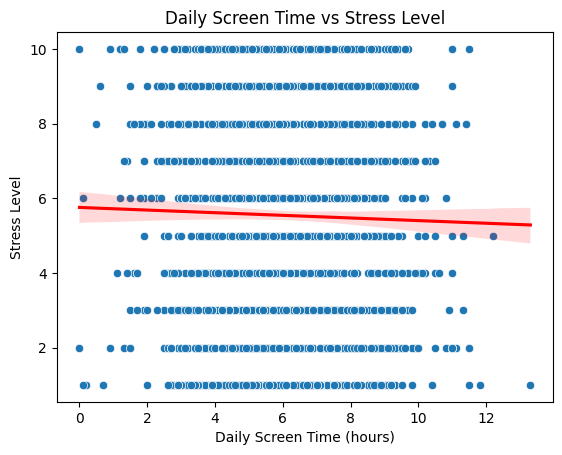

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='daily_screen_time_hours',
    y='stress_level',
    data=df
)

sns.regplot(
    x='daily_screen_time_hours',
    y='stress_level',
    data=df,
    scatter=False,
    color='red'
)

plt.title("Daily Screen Time vs Stress Level")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Stress Level")
plt.show()


**Interpretation:**  
The scatter plot suggests a very weak negative linear relationship between daily screen time and stress level. Although a slight downward trend is visible, the wide dispersion of data points indicates that daily screen time is not a strong predictor of stress level in this dataset.


## Spearman correltion

Hypotheses

**Null Hypothesis (H₀):**  
There is no monotonic relationship between physical activity hours per week and stress level.

**Alternative Hypothesis (H₁):**  
There is a monotonic relationship between physical activity hours per week and stress level.


In [25]:
from scipy.stats import spearmanr

rho, p_spear = spearmanr(
    df['physical_activity_hours_per_week'],
    df['stress_level']
)

rho, p_spear


(np.float64(0.017904074071914716), np.float64(0.423561275866961))

In [26]:
alpha = 0.05

if p_spear < alpha:
    print("Reject the null hypothesis: a statistically significant correlation exists.")
else:
    print("Fail to reject the null hypothesis: no statistically significant correlation detected.")


Fail to reject the null hypothesis: no statistically significant correlation detected.


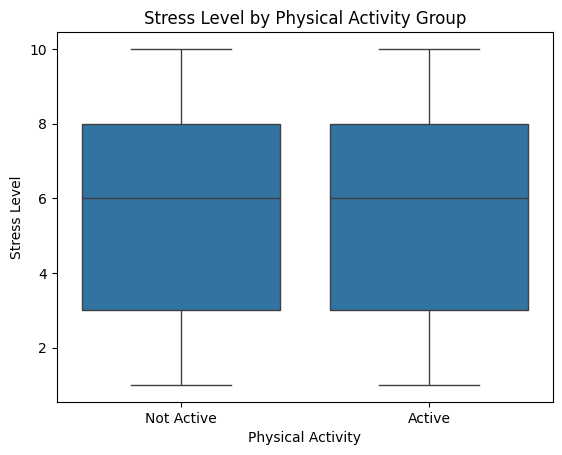

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='physically_active',
    y='stress_level',
    data=df
)

plt.xticks([0, 1], ['Not Active', 'Active'])
plt.title("Stress Level by Physical Activity Group")
plt.xlabel("Physical Activity")
plt.ylabel("Stress Level")
plt.show()


The boxplot shows similar stress level distributions across physical activity groups, supporting the Spearman correlation result indicating no significant relationship.


A significance level of α = 0.05 was used for all statistical tests.


**Interpretation:**  
Spearman correlation analysis showed no statistically significant monotonic relationship between physical activity hours per week and stress level (ρ = 0.02, p = 0.42). Therefore, the null hypothesis was not rejected.


**Correlation Testing Summary:**  
Multiple correlation analyses were conducted to examine relationships between lifestyle factors and health-related outcomes. Pearson correlation showed no meaningful linear association between daily screen time and stress level. Spearman correlation similarly indicated no statistically significant monotonic relationship between physical activity and stress level. Overall, these findings suggest that the examined lifestyle variables are not strongly associated with stress-related outcomes in this dataset.


## Phi Coefficient

Association between Stress Level and Sleep Quality

Variables

Binary: high_stress

Binary: good_sleep

Hypotheses

**Null Hypothesis (H₀):**  
There is no association between high stress level and sleep quality.

**Alternative Hypothesis (H₁):**  
There is an association between high stress level and sleep quality.


In [28]:
import pandas as pd

contingency_table = pd.crosstab(
    df['high_stress'],
    df['good_sleep']
)

contingency_table


good_sleep,0,1
high_stress,,
0,805,585
1,374,236


Phi coefficient

In [29]:
from scipy.stats import chi2_contingency
import numpy as np

chi2, p_phi, dof, expected = chi2_contingency(contingency_table)

phi = np.sqrt(chi2 / df.shape[0])

phi, p_phi


(np.float64(0.03069730082042913), np.float64(0.16980674836530793))

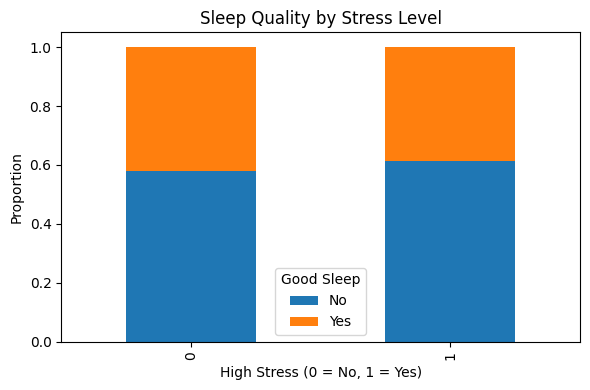

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Create contingency table
contingency_table = pd.crosstab(
    df['high_stress'],
    df['good_sleep'],
    normalize='index'   # proportions by stress group
)

# Plot
contingency_table.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title("Sleep Quality by Stress Level")
plt.xlabel("High Stress (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(title="Good Sleep", labels=["No", "Yes"])
plt.tight_layout()
plt.show()


**Visualization Interpretation:**  
The bar chart shows similar proportions of good and poor sleep quality across stress level groups. This visual pattern supports the Phi coefficient result, indicating no statistically significant association between stress level and sleep quality.


Decision rule

In [31]:
alpha = 0.05

if p_phi < alpha:
    print("Reject the null hypothesis: a statistically significant association exists.")
else:
    print("Fail to reject the null hypothesis: no statistically significant association detected.")


Fail to reject the null hypothesis: no statistically significant association detected.


**Interpretation:**  
Phi coefficient analysis showed no statistically significant association between stress level and sleep quality (φ = 0.03, p = 0.17). Therefore, the null hypothesis was not rejected.


## Python correlation matrix

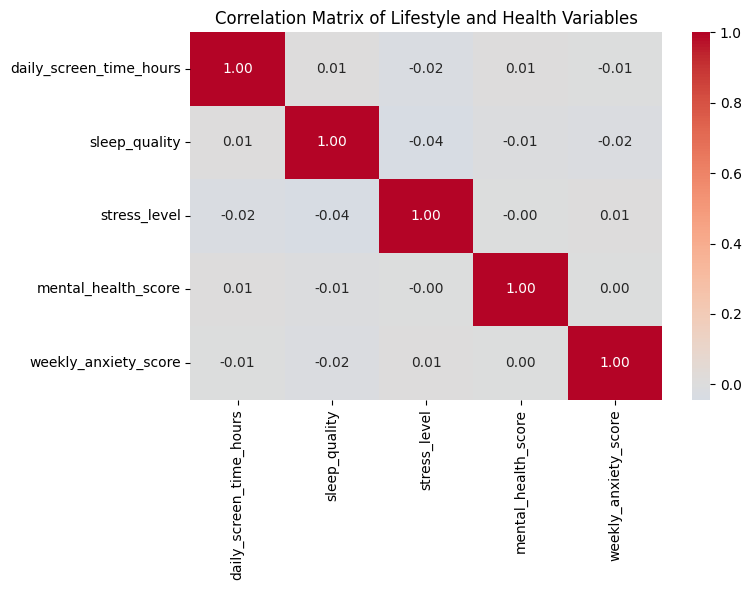

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df[corr_vars].corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Matrix of Lifestyle and Health Variables")
plt.tight_layout()
plt.show()


**Visualization Interpretation:**  
The correlation matrix shows that all pairwise correlations between lifestyle and health variables are very weak, with coefficients close to zero. This indicates the absence of strong linear relationships in the dataset and supports the results obtained from individual hypothesis and correlation tests.
